In [5]:
# Suite of libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [87]:
movies = pd.read_csv('11_input_for_regression.csv')

movies['Max Theaters sqrt'] = movies['Max Theaters']**0.5

movies.columns


Index(['Unnamed: 0', 'Release', 'Release Date', 'Genres', 'URL', 'Distributor',
       'Calendar Gross', 'Total Gross', 'Max Theaters', 'MPAA_numeric',
       'Rating', 'Votes', 'Budget', 'wkGROSS_1', 'wkGROSS_2', 'wkGROSS_3',
       'wkGROSS_4', 'wkGROSS_5', 'wkGROSS_6', 'wkGROSS_7', 'wkGROSS_8',
       'wkGROSS_9', 'wkGROSS_10', 'wkGROSS_11', 'wkGROSS_12', 'wkGROSS_13',
       'wkGROSS_14', 'wkGROSS_15', 'nTHEATERS_1', 'nTHEATERS_2', 'nTHEATERS_3',
       'nTHEATERS_4', 'nTHEATERS_5', 'nTHEATERS_6', 'nTHEATERS_7',
       'nTHEATERS_8', 'nTHEATERS_9', 'nTHEATERS_10', 'nTHEATERS_11',
       'nTHEATERS_12', 'nTHEATERS_13', 'nTHEATERS_14', 'nTHEATERS_15',
       'pTAG_1', 'pTAG_2', 'pTAG_3', 'pTAG_4', 'pTAG_5', 'pTAG_6', 'pTAG_7',
       'pTAG_8', 'pTAG_9', 'pTAG_10', 'pTAG_11', 'pTAG_12', 'pTAG_13',
       'pTAG_14', 'pTAG_15', 'Max Theaters sqrt'],
      dtype='object')

In [3]:
df_features = movies[['Calendar Gross','Max Theaters', 'Votes', 'Rating', 'Budget', 'wkGROSS_4']]
df_features.head()

,Calendar Gross,Max Theaters,Votes,Rating,Budget,wkGROSS_4
0,4784214,149,63657,7.8,10000000,198685
1,146259321,1222,96363,7.4,21000000,15188611
2,63541777,1137,79517,6.8,6200000,7245305
3,34003216,1259,53999,7.4,8000000,5997753
4,74420269,1259,53999,7.4,8000000,5997753


In [38]:
df_features['Votes'].max()

2017251

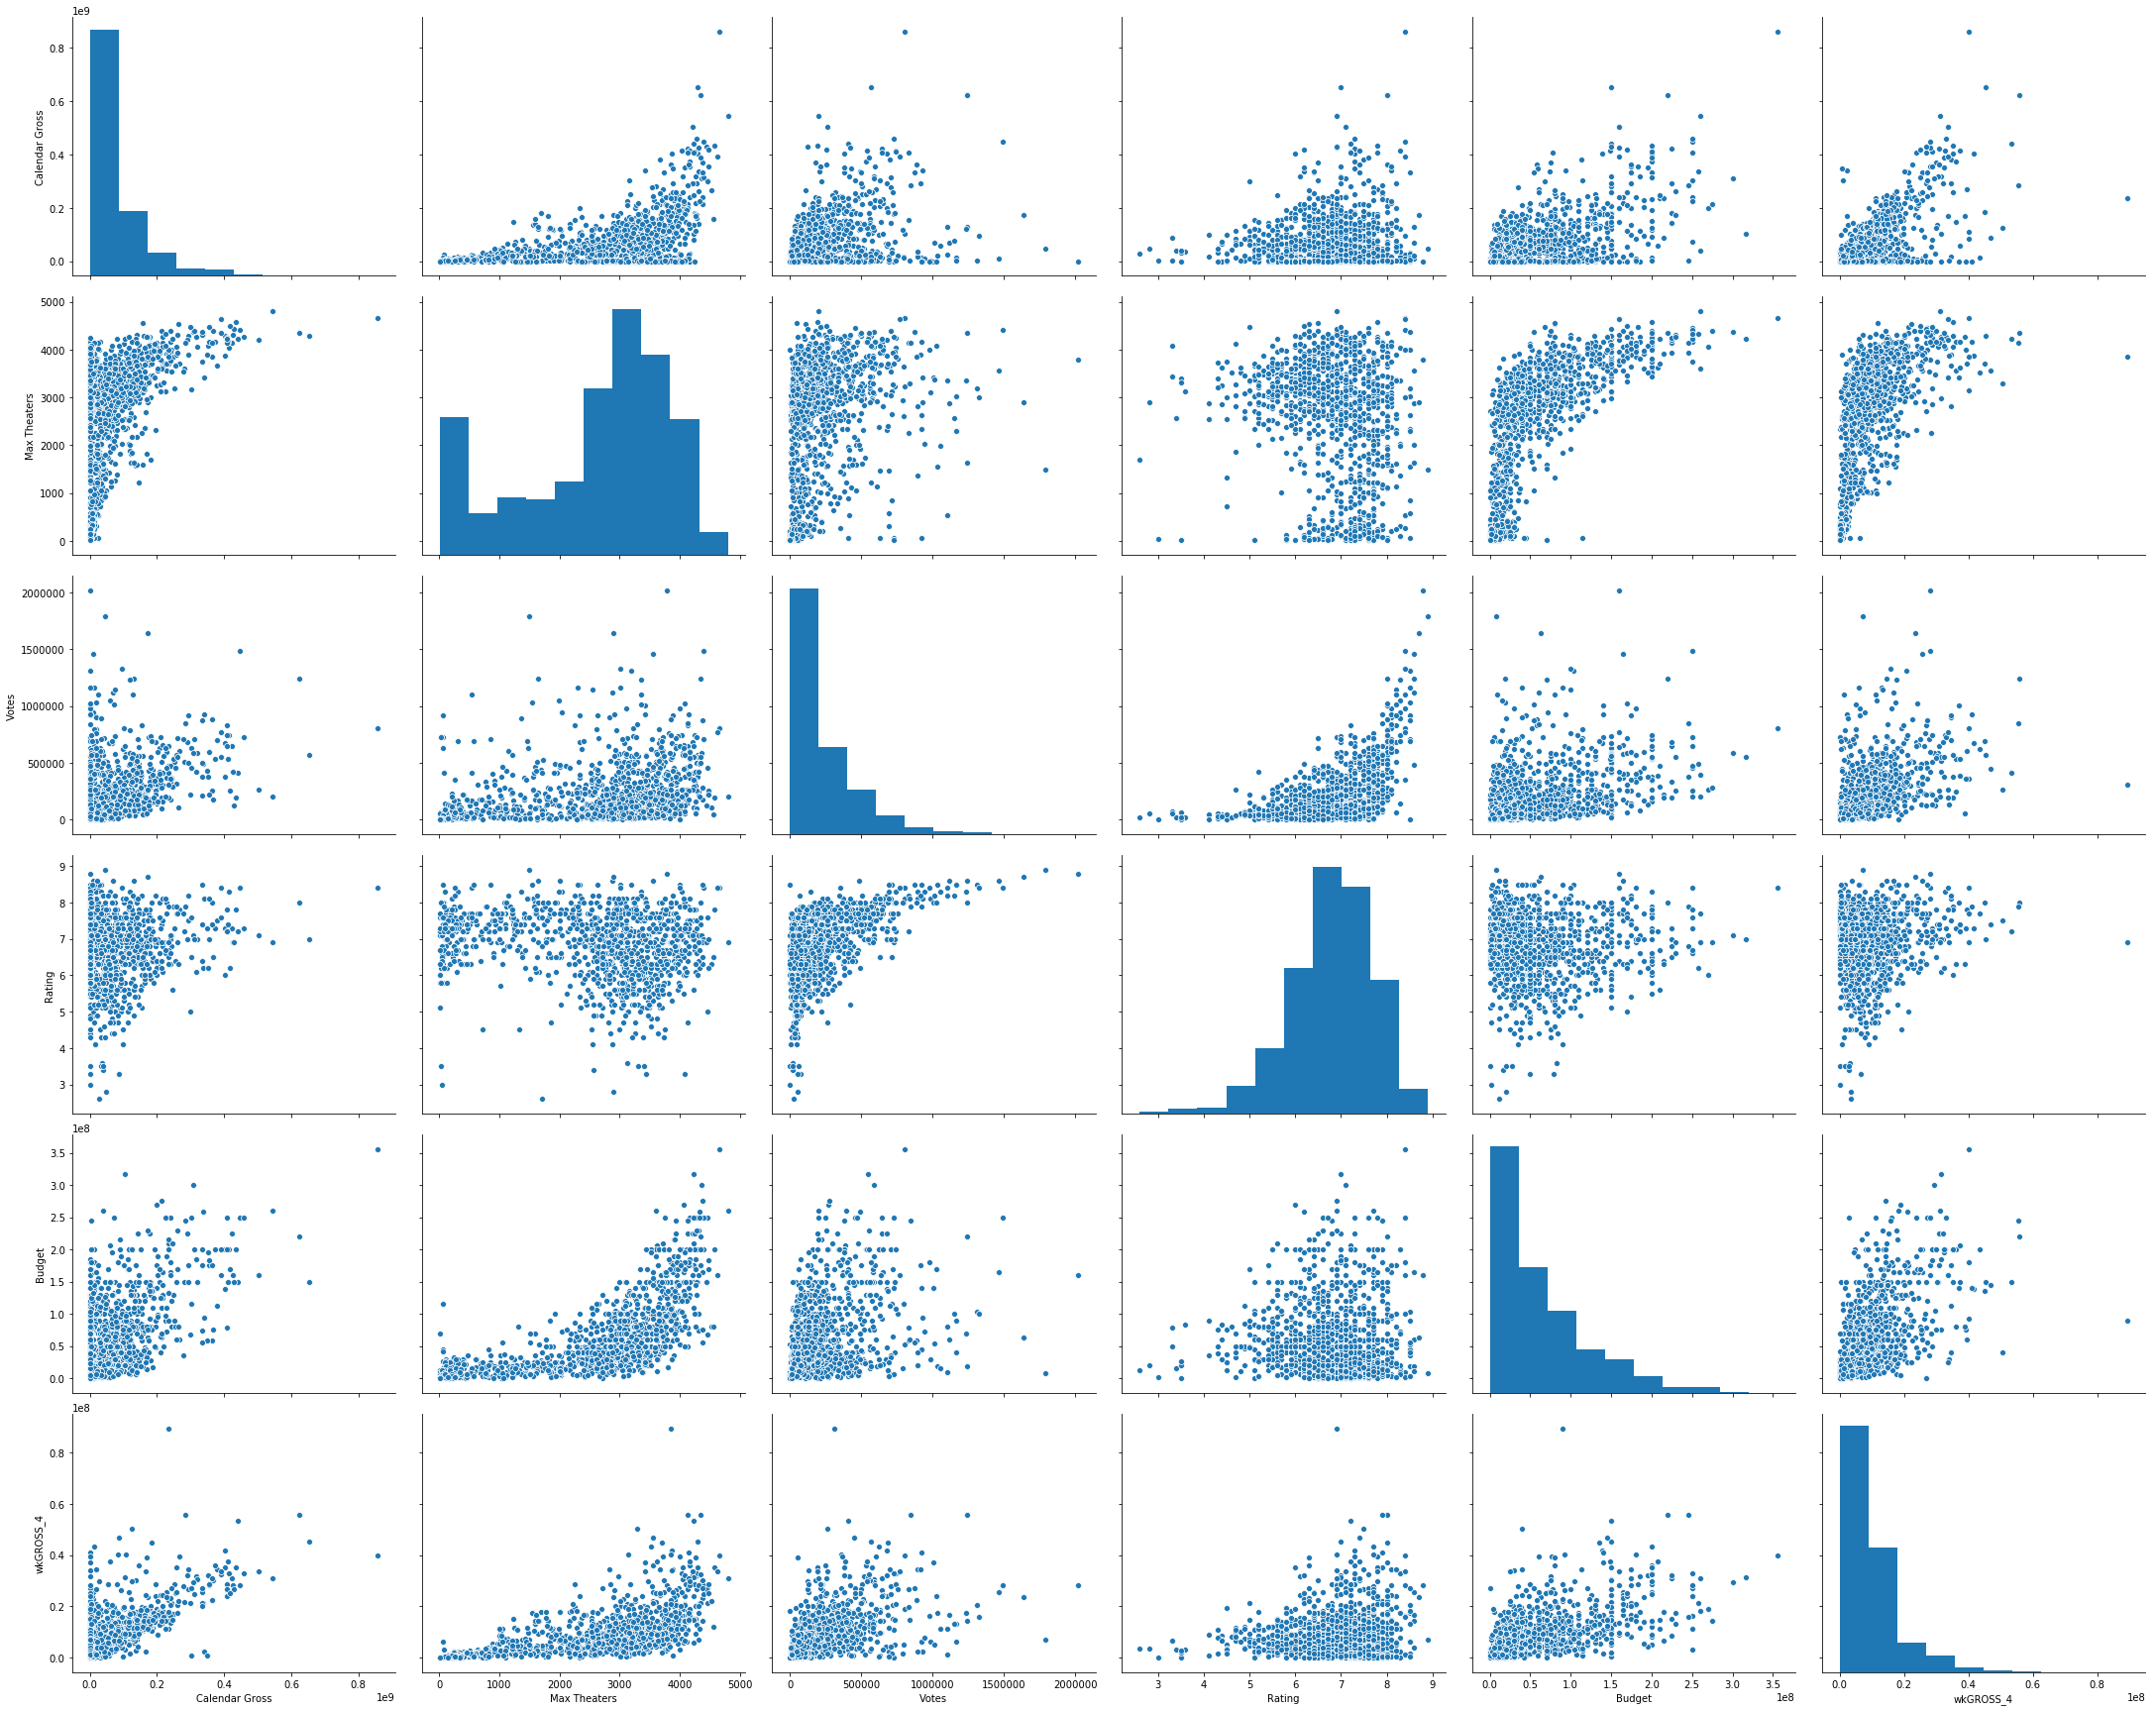

In [7]:
# Plot all of the variable-to-variable relations as scatterplots
#sns.pairplot(new_df, height=4, aspect=1.25);
sns_plot = sns.pairplot(df_features, height=4, aspect=1.25)
#sns_plot.savefig('many_features_pairplot.pdf')

In [58]:
df_features.columns

Index(['Calendar Gross', 'Max Theaters', 'Votes', 'Rating', 'Budget',
       'wkGROSS_4', 'Max Theaters2'],
      dtype='object')

In [57]:
df_features['Max Theaters2']=df_features['Max Theaters']**2

C:\Users\huahuashishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
#x1 = df_features['Max Theaters2'][movies['wkGROSS_4']>=1000000]
#y  = df_features['Calendar Gross'][movies['wkGROSS_4']>=1000000]
#x2 = df_features['Budget'][movies['wkGROSS_4']>=1000000]

x1 = df_featur['Calendar Gross']
x2 = movies['Budget']


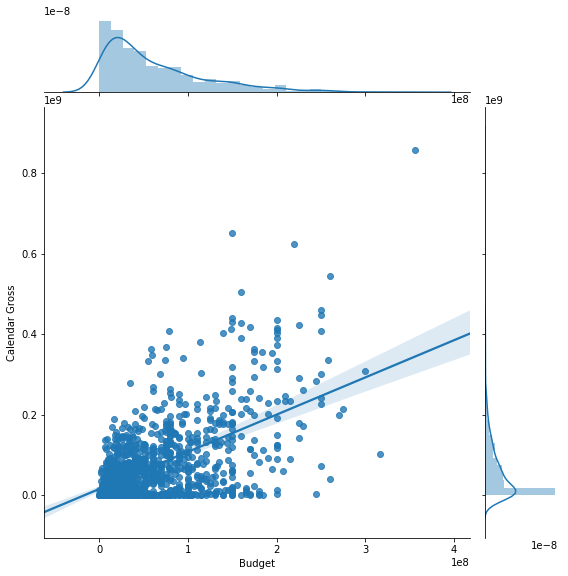

In [75]:
#g = sns.regplot(x2, y)
sns_plot = sns.jointplot(x2, y, data=df_features, kind='reg', height=8)
sns_plot.savefig('x2_vs_y_jointplot.pdf')

In [79]:
df_features['Max Theaters sqrt'] = df_features['Max Theaters']**0.5
X=df_features[['Max Theaters sqrt','wkGROSS_1']]

# Add a column of ones with sm.add_constant()
#sm.add_constant(X).head()
X.head()

C:\Users\huahuashishi\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


KeyError: "['wkGROSS_1'] not in index"

In [89]:
X = movies[['Max Theaters sqrt','Max Theaters']]
#Create the model
model = sm.OLS(y, sm.add_constant(X))
#Fit
fit = model.fit()
#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Calendar Gross   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     266.2
Date:                Fri, 09 Oct 2020   Prob (F-statistic):           2.80e-95
Time:                        03:33:19   Log-Likelihood:                -21957.
No. Observations:                1121   AIC:                         4.392e+04
Df Residuals:                    1118   BIC:                         4.394e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.114e+07   1.14e+07      5.381      0.000    3.88e+07    8.34e+07
Max Theaters sqrt -6.095e+06   6.76e+05     -9.011      0.000   -7.42e+06   -4.77e+06
Max Theaters       1.177e+05   8892.321     13.239      0.000       1e+05    1.35e+05
==============================================================================
Omnibus:                      465.406   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3819.570
Skew:                           1.701   Prob(JB):                         0.00
Kurtosis:                      11.379   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
from sklearn.linear_model import LinearRegression
import pandas as pd

movies['Max Theaters2']=movies['Max Theaters']**2

m = LinearRegression()
m.fit(movies[['wkGROSS_1','Max Theaters2']],movies['Calendar Gross'])
m.score(movies[['wkGROSS_1','Max Theaters2']],movies['Calendar Gross'])

0.50575542531138629

In [90]:
movies = pd.read_csv('11_input_for_regression.csv')

movies.columns

Index(['Unnamed: 0', 'Release', 'Release Date', 'Genres', 'URL', 'Distributor',
       'Calendar Gross', 'Total Gross', 'Max Theaters', 'MPAA_numeric',
       'Rating', 'Votes', 'Budget', 'wkGROSS_1', 'wkGROSS_2', 'wkGROSS_3',
       'wkGROSS_4', 'wkGROSS_5', 'wkGROSS_6', 'wkGROSS_7', 'wkGROSS_8',
       'wkGROSS_9', 'wkGROSS_10', 'wkGROSS_11', 'wkGROSS_12', 'wkGROSS_13',
       'wkGROSS_14', 'wkGROSS_15', 'nTHEATERS_1', 'nTHEATERS_2', 'nTHEATERS_3',
       'nTHEATERS_4', 'nTHEATERS_5', 'nTHEATERS_6', 'nTHEATERS_7',
       'nTHEATERS_8', 'nTHEATERS_9', 'nTHEATERS_10', 'nTHEATERS_11',
       'nTHEATERS_12', 'nTHEATERS_13', 'nTHEATERS_14', 'nTHEATERS_15',
       'pTAG_1', 'pTAG_2', 'pTAG_3', 'pTAG_4', 'pTAG_5', 'pTAG_6', 'pTAG_7',
       'pTAG_8', 'pTAG_9', 'pTAG_10', 'pTAG_11', 'pTAG_12', 'pTAG_13',
       'pTAG_14', 'pTAG_15'],
      dtype='object')

In [91]:
X=movies[['Max Theaters','Rating', 'Votes', 'Budget', 'wkGROSS_1']]

In [92]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.57881067817187515

In [93]:
X_poly

array([[  1.00000000e+00,   1.49000000e+02,   7.80000000e+00, ...,
          1.00000000e+14,   2.35440000e+11,   5.54319936e+08],
       [  1.00000000e+00,   1.22200000e+03,   7.40000000e+00, ...,
          4.41000000e+14,   2.23448715e+14,   1.13218431e+14],
       [  1.00000000e+00,   1.13700000e+03,   6.80000000e+00, ...,
          3.84400000e+13,   4.48036056e+13,   5.22206835e+13],
       ..., 
       [  1.00000000e+00,   3.61300000e+03,   5.90000000e+00, ...,
          9.00000000e+14,   3.25033770e+14,   1.17385502e+14],
       [  1.00000000e+00,   3.46100000e+03,   7.90000000e+00, ...,
          1.60000000e+15,   5.85781800e+14,   2.14462698e+14],
       [  1.00000000e+00,   1.51600000e+03,   5.90000000e+00, ...,
          3.60000000e+13,   5.56050600e+13,   8.58867416e+13]])

In [94]:
#using statsmod: for polynomial data generated using SKLearn 
model = sm.OLS(y, sm.add_constant(X_poly))
#Fit
fit = model.fit()
#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Calendar Gross   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     88.89
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          9.60e-193
Time:                        08:19:40   Log-Likelihood:                -21692.
No. Observations:                1121   AIC:                         4.342e+04
Df Residuals:                    1103   BIC:                         4.351e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2779     10.678      2.929      0.003      10.326      52.230
x1          4.128e+04   1.41e+04      2.932      0.003    1.37e+04    6.89e+04
x2           135.9299     46.125      2.947      0.003      45.428     226.432
x3           623.8616    143.038      4.362      0.000     343.205     904.519
x4            -0.5528      0.564     -0.981      0.327      -1.659       0.553
x5            -4.9005      0.837     -5.854      0.000      -6.543      -3.258
x6            -7.3128      2.337     -3.129      0.002     -11.898      -2.727
x7         -1539.8816   1818.592     -0.847      0.397   -5108.172    2028.409
x8             0.0094      0.011      0.832      0.406      -0.013       0.032
x9             0.0004   9.32e-05      3.882      0.000       0.000       0.001
x10            0.0008      0.000      6.118      0.000       0.001       0.001
x11          317.6986    104.678      3.035      0.002     112.307     523.090
x12          -71.3154     19.175     -3.719      0.000    -108.938     -33.693
x13           -0.0684      0.078     -0.879      0.380      -0.221       0.084
x14            0.4033      0.098      4.131      0.000       0.212       0.595
x15        -9.311e-06   2.75e-05     -0.339      0.735   -6.33e-05    4.47e-05
x16         1.742e-07   2.87e-07      0.608      0.543   -3.88e-07    7.36e-07
x17         -7.23e-07   2.78e-07     -2.601      0.009   -1.27e-06   -1.78e-07
x18        -6.185e-10   8.12e-10     -0.762      0.446   -2.21e-09    9.74e-10
x19        -3.336e-09   1.16e-09     -2.879      0.004   -5.61e-09   -1.06e-09
x20         1.288e-09   7.15e-10      1.802      0.072   -1.14e-10    2.69e-09
==============================================================================
Omnibus:                      118.186   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.550
Skew:                          -0.306   Prob(JB):                    4.01e-141
Kurtosis:                       6.670   Cond. No.                     9.97e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.97e+17. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

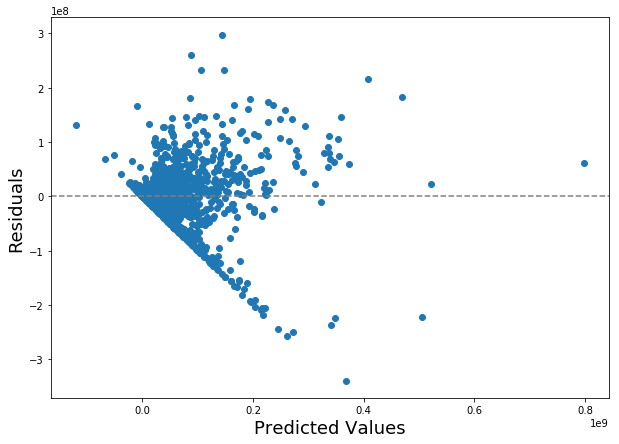

In [100]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);
plt.savefig('residuals_via_statsmod.pdf')

In [98]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

y_train=movies['Calendar Gross']

m = LassoCV()
p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(X_poly)
s = StandardScaler(with_mean=False)
X_train_poly_scaled = s.fit_transform(X_train_poly)
m.fit(X_train_poly_scaled,y_train)
m.score(X_train_poly_scaled,y_train)

C:\Users\huahuashishi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\huahuashishi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\huahuashishi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\huahuashishi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not conver

C:\Users\huahuashishi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\huahuashishi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\huahuashishi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\huahuashishi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not conver

0.55981387793146409